In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel("world_happiness.xlsx")

In [3]:
rename_dict = {
    "Year": "Year",
    "Rank": "Rank",
    "Country name": "Country",
    "Ladder score": "Ladder Score",
    "upperwhisker": "Upperwhisker",
    "lowerwhisker": "Lowerwhisker",
    "Explained by: Log GDP per capita": "Log GDP per capita",
    "Explained by: Social support": "Social support",
    "Explained by: Healthy life expectancy": "Healthy life expectancy",
    "Explained by: Freedom to make life choices": "Freedom to make life choices",
    "Explained by: Generosity": "Generosity",
    "Explained by: Perceptions of corruption": "Perceptions of corruption",
    "Dystopia + residual": "Dystopia + residual"
}

In [4]:
dataset = dataset.rename(columns=rename_dict)

In [5]:
dataset_poland = dataset[dataset["Country"] == "Poland"]
dataset_poland

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
353,2024,26,Poland,6.6730,6.73400,6.611000,1.666000,1.5950,0.630000,0.790000,0.021000,0.169000,1.802000
1404,2023,35,Poland,6.4420,6.51300,6.370000,1.738000,1.4170,0.639000,0.600000,0.081000,0.175000,1.791000
1405,2022,39,Poland,6.2600,6.34300,6.177000,1.767000,1.4740,0.477000,0.511000,0.120000,0.139000,1.772000
1406,2021,48,Poland,6.1230,6.20500,6.040000,1.758000,1.1740,0.712000,0.523000,0.124000,0.140000,1.693000
1407,2020,45,Poland,6.1660,6.24500,6.087000,1.309000,0.9820,0.668000,0.558000,0.080000,0.130000,2.438000
1408,2019,43,Poland,6.1863,6.25588,6.116719,1.169229,1.3104,0.868038,0.557904,0.063374,0.160541,2.056798
1409,2018,40,Poland,6.1820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410,2017,42,Poland,6.1230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1411,2016,46,Poland,5.9730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412,2015,57,Poland,5.8350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
years = dataset_poland["Year"]
ladder_score = dataset_poland["Ladder Score"]

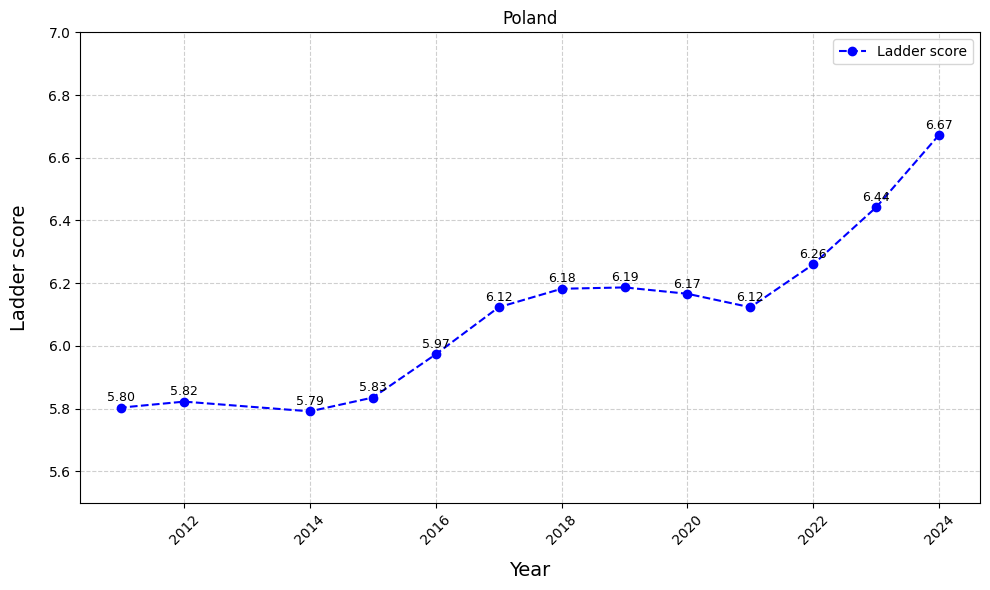

In [7]:
plt.figure(figsize=(10, 6))
for x, y in zip(years, ladder_score):
    plt.text(x, y + 0.02, f"{y:.2f}", ha='center', fontsize=9)
plt.plot(years, ladder_score, label="Ladder score", color='blue', marker='o', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.title("Poland")
plt.ylim(5.5, 7)
plt.ylabel("Ladder score", fontsize=14, labelpad=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In comparison with countries in the EU

In [8]:
euro_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovenia", "Spain", "Sweden"]

In [9]:
dataset_2024 = dataset[(dataset["Year"] == 2024) & (dataset["Country"].isin(euro_countries))]
dataset_2024

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
109,2024,9,Luxembourg,7.122,7.213,7.031,2.028,1.558,0.864,0.931,0.117,0.397,1.227
181,2024,14,Belgium,6.910,6.974,6.845,1.783,1.646,0.852,0.895,0.119,0.306,1.309
194,2024,15,Ireland,6.889,6.977,6.801,1.988,1.659,0.823,0.906,0.179,0.382,0.952
207,2024,16,Lithuania,6.829,6.912,6.746,1.684,1.699,0.592,0.702,0.031,0.123,1.998
220,2024,17,Austria,6.810,6.891,6.728,1.791,1.592,0.814,0.856,0.179,0.280,1.297
246,2024,19,Slovenia,6.792,6.889,6.695,1.692,1.718,0.802,0.961,0.121,0.113,1.384


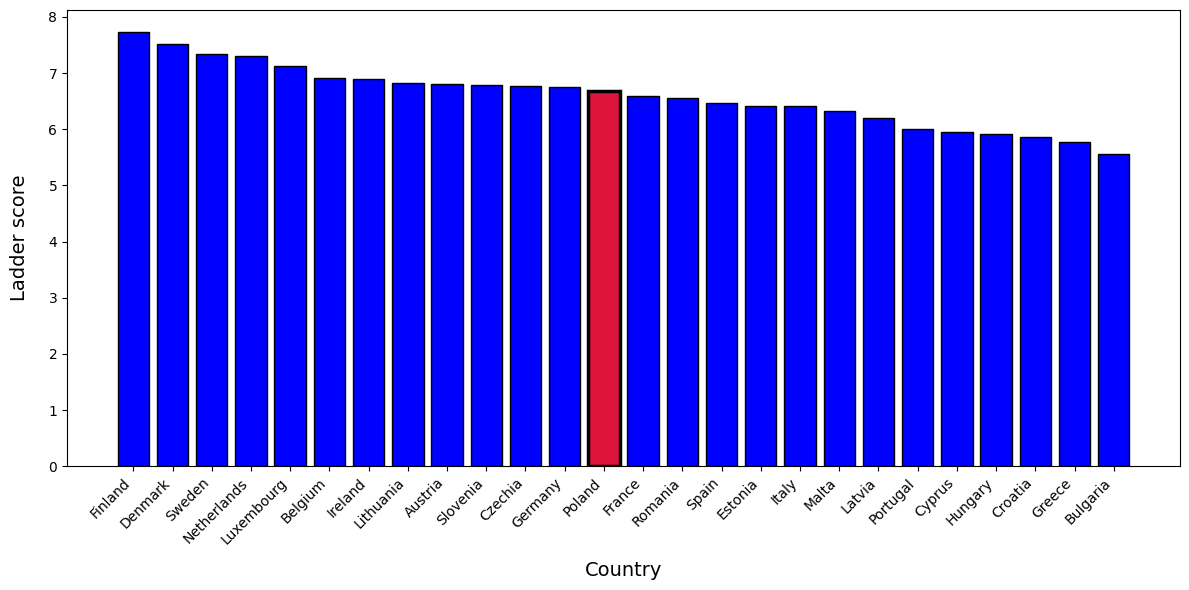

In [10]:
countries = list(dataset_2024["Country"])
scores = list(dataset_2024["Ladder Score"])
highlight = "Poland"

colors = ['blue' if country != highlight else 'crimson' for country in countries]

plt.figure(figsize=(12, 6))
bars = plt.bar(countries, scores, color=colors, edgecolor='black')

for bar, country in zip(bars, countries):
    if country == highlight:
        bar.set_linewidth(2.5)
        bar.set_edgecolor('black')

plt.xlabel("Country",  fontsize=14, labelpad=10)
plt.ylabel("Ladder score", fontsize=14, labelpad=14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()